In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import  confusion_matrix, classification_report
import seaborn as sns

import matplotlib.pyplot as plt


In [24]:
label_mapping = {
    "Koulutus_ja_kasvatus": 0,
    "Liikenne_ja_kuljetus": 1,
    "Onnettomuudet": 2,
    "Rikokset": 3,
    "Terveys": 4,
    "kulttuuri": 5,
    "luonto": 6,
    "politiikka": 7,
    "talous": 8,
    "urheilu": 9
}

to_labels = {y: x for x, y in label_mapping.items()}

In [25]:
# old
predictions = np.array([0,8,6,7,7,7,7,7,8,1,7,5,8,5,7,8,5,0,5,8,8,8,1,8,5,5,0,5,7,7,7,5,8,8,0,0,8,7,8,8,5,8,5,8,8,8,8,5,8,5,8,5,5,3,5,8,5,7,7,7,7,5,5])
correct_labels = np.array([3,1,3,7,7,7,7,7,8,1,1,5,1,7,7,7,8,7,5,8,8,5,1,8,3,3,0,7,7,7,7,7,8,7,0,7,5,7,8,8,5,8,6,5,8,8,8,7,8,5,1,5,5,1,6,1,8,7,7,7,7,6,8])

# modern
predictions_modern = np.array([0,8,6,8,7,7,7,7,8,1,5,5,8,8,7,8,8,0,5,8,8,8,1,3,3,3,0,5,7,7,7,5,8,8,0,0,8,7,8,8,5,1,6,8,8,8,8,3,8,5,8,5,5,1,6,1,1,7,7,7,7,7,5])
correct_labels_modern = np.array([3,1,3,7,7,7,7,7,8,1,1,5,1,7,7,7,8,7,5,8,8,5,1,8,3,3,0,7,7,7,7,7,8,7,0,7,5,7,8,8,5,8,6,5,8,8,8,7,8,5,1,5,5,1,6,1,8,7,7,7,7,6,8])

# old
predictions = [to_labels[x] for x in predictions]
correct_labels = [to_labels[x] for x in correct_labels]

# modern
predictions_modern = [to_labels[x] for x in predictions_modern]
correct_labels_modern = [to_labels[x] for x in correct_labels_modern]


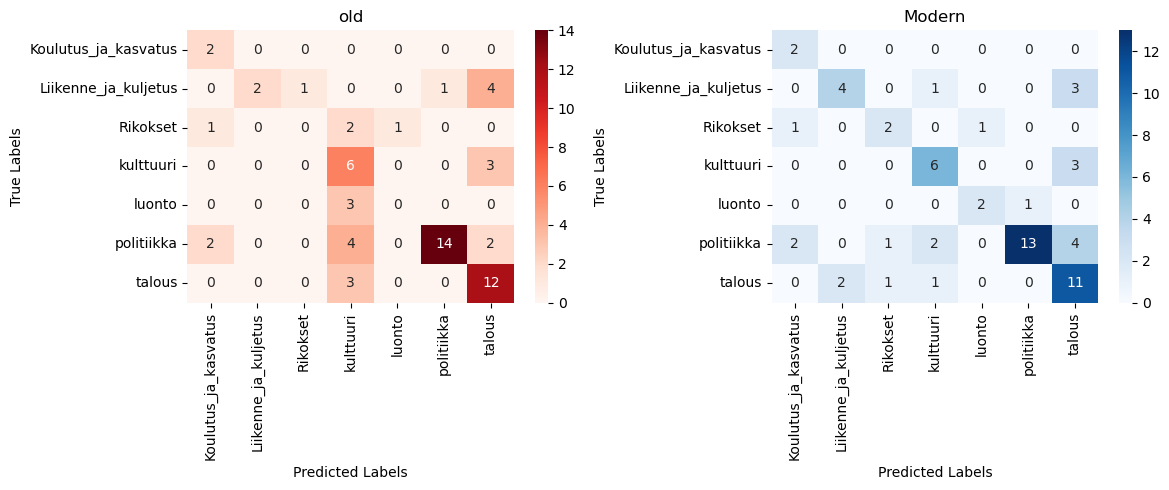

old
                      precision    recall  f1-score   support

Koulutus_ja_kasvatus       0.40      1.00      0.57         2
Liikenne_ja_kuljetus       1.00      0.25      0.40         8
            Rikokset       0.00      0.00      0.00         4
           kulttuuri       0.33      0.67      0.44         9
              luonto       0.00      0.00      0.00         3
          politiikka       0.93      0.64      0.76        22
              talous       0.57      0.80      0.67        15

            accuracy                           0.57        63
           macro avg       0.46      0.48      0.41        63
        weighted avg       0.65      0.57      0.56        63

modern
                      precision    recall  f1-score   support

Koulutus_ja_kasvatus       0.40      1.00      0.57         2
Liikenne_ja_kuljetus       0.67      0.50      0.57         8
            Rikokset       0.50      0.50      0.50         4
           kulttuuri       0.60      0.67      0.63    

In [29]:


# Compute confusion matri
cm = confusion_matrix(correct_labels, predictions)
cm_modern = confusion_matrix(correct_labels_modern, predictions_modern)

labl = ["Koulutus_ja_kasvatus", "Liikenne_ja_kuljetus", "Rikokset", "kulttuuri", "luonto", "politiikka", "talous"]


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labl, yticklabels=labl, ax=axes[0])
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[0].set_title("old")

# Plot the second confusion matrix
sns.heatmap(cm_modern, annot=True, fmt='d', cmap='Blues', xticklabels=labl, yticklabels=labl, ax=axes[1])
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[1].set_title("Modern")

# Adjust layout
plt.tight_layout()
plt.show()

print("old")
print(classification_report(correct_labels, predictions))
print("modern")
print(classification_report(correct_labels_modern, predictions_modern))


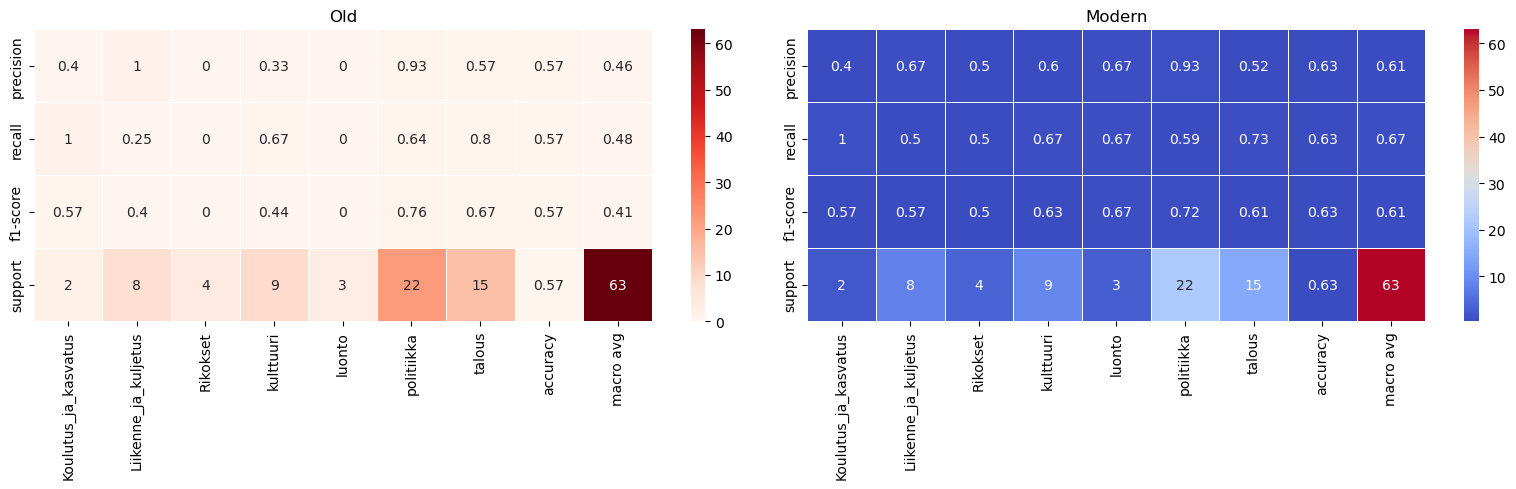

In [32]:
report = classification_report(correct_labels, predictions, output_dict=True)
report_modern = classification_report(correct_labels_modern, predictions_modern, output_dict=True)


df_report = pd.DataFrame(report).transpose()
df_report_modern = pd.DataFrame(report_modern).transpose()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the first classification report
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Reds", linewidths=0.5, ax=axes[0])
axes[0].set_title("Old")

# Plot the second classification report
sns.heatmap(df_report_modern.iloc[:-1, :].T, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[1])
axes[1].set_title("Modern")

# Adjust layout
plt.tight_layout()
plt.show()

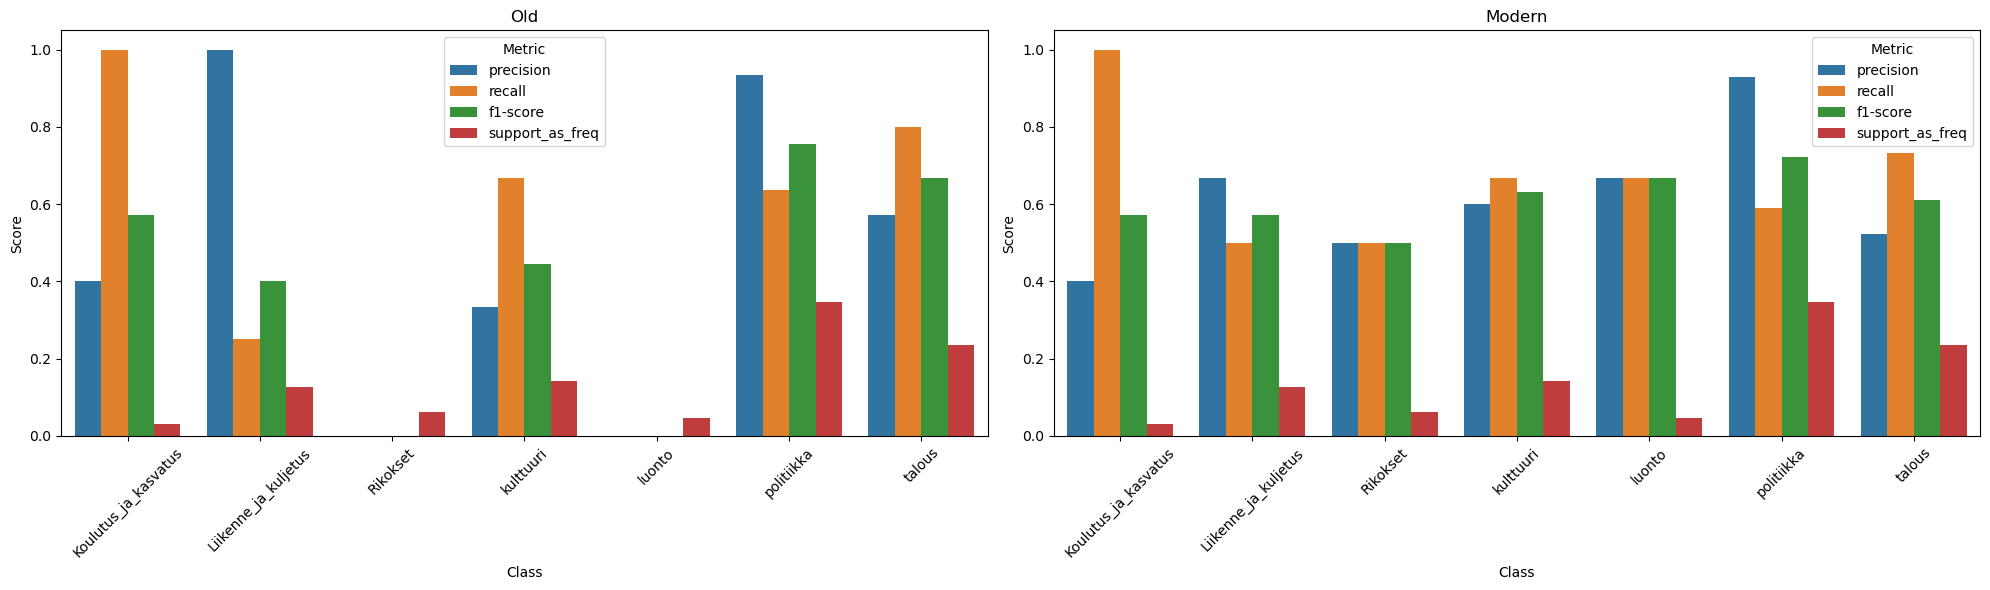

In [34]:
df_report = pd.DataFrame(report).drop(["weighted avg", "macro avg"], axis=1).transpose()
df_report['support_as_freq'] = df_report['support'] / df_report['support'].sum()
df_report.drop(["support"], axis=1, inplace=True)
df_report = df_report.iloc[:-1, :].reset_index().melt(id_vars="index")

df_report_modern = pd.DataFrame(report_modern).drop(["weighted avg", "macro avg"], axis=1).transpose()
df_report_modern['support_as_freq'] = df_report_modern['support'] / df_report_modern['support'].sum()
df_report_modern.drop(["support"], axis=1, inplace=True)
df_report_modern = df_report_modern.iloc[:-1, :].reset_index().melt(id_vars="index")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first classification report
sns.barplot(x="index", y="value", hue="variable", data=df_report, ax=axes[0])
axes[0].set_title("Old")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Score")
axes[0].legend(title="Metric")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot the second classification report
sns.barplot(x="index", y="value", hue="variable", data=df_report_modern, ax=axes[1])
axes[1].set_title("Modern")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Score")
axes[1].legend(title="Metric")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()
